In [1]:
from models import Field, Config, Environment, Animal

In [2]:
config = Config(food_per_year=10, eaten_food=2, size=5, init_animals=10)

In [26]:
env = Environment(config=config)
env.set_food(food=90, from_x=0, to_x=3, from_y=0, to_y=2)
env.set_danger(danger=80, from_x=0, to_x=config.size, from_y=0, to_y=config.size)

In [27]:
env.run(number_of_iterations=100)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
import json 

In [6]:
with open('./data/stats.json', 'w') as outfile:
    json.dump(env.stats, outfile)

In [7]:
with open('./data/stats.json', 'r') as infile:
    d = json.load(infile)

In [8]:
import pandas as pd 

In [9]:
df = pd.DataFrame(env.stats) 

In [11]:
df.to_csv('./data/stats.tsv', sep='\t')

In [29]:
df = pd.read_csv('./data/stats.tsv', sep='\t', index_col=0)

In [38]:
df.tail(20)

,iteration,x,y,energy,age,death,children
341,9,3,1,47.0,0,0.0,4
342,9,3,1,48.0,1,0.0,0
343,9,3,1,49.0,0,0.0,0
344,9,3,1,44.0,1,0.0,7
345,9,2,2,48.0,0,0.0,0
346,9,3,1,49.0,0,0.0,1
347,9,2,1,47.0,0,0.0,3
348,9,3,1,49.0,0,0.0,1
349,9,3,1,49.0,1,NaN,1
350,9,3,1,48.0,0,0.0,2


In [31]:
s = df.groupby('iteration').mean()['energy']

In [32]:
import matplotlib.pyplot as plt

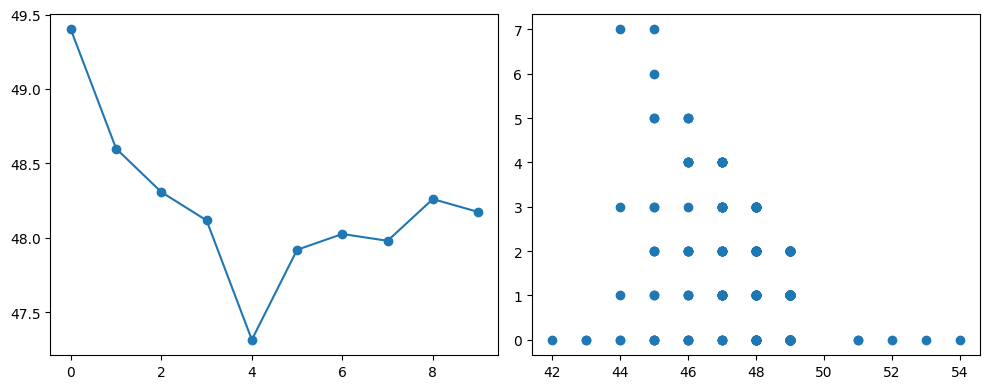

In [41]:
fig, ax = plt.subplots(figsize=(10, 4), ncols=2)
ax[0].plot(s, marker='o')
ax[1].scatter(df['energy'], df['children'])
plt.tight_layout()
plt.show()